In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

데이터 생성

In [3]:
X = torch.randn(100, 2)
y = torch.where(X[:,0] > X[:,1],1, -1).float()
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=10)

SVM 모델 정의 

In [11]:
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.linear(x)

모델, 손실함수, 옵티마이저 생성

In [13]:
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # 양성 1 음성 -1 클래스로 지정되어 있어야 사용가능
# (주어진 입력과 대상 사이의 경계선 손실값 계산하는 함수) -> 이진 분류 문제에서 사용
optimizer = optim.SGD(model.parameters(), lr = 0.01)

모델 학습

In [16]:
for epoch in range(50):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 10 == 0 : 
        print(f"Epoch [{epoch+1}/50], Loss:{loss.item():.4f}")

Epoch [10/50], Loss:-0.0794
Epoch [20/50], Loss:-0.2496
Epoch [30/50], Loss:-0.4128
Epoch [40/50], Loss:-0.5729
Epoch [50/50], Loss:-0.7292


결정 경계 시각화 

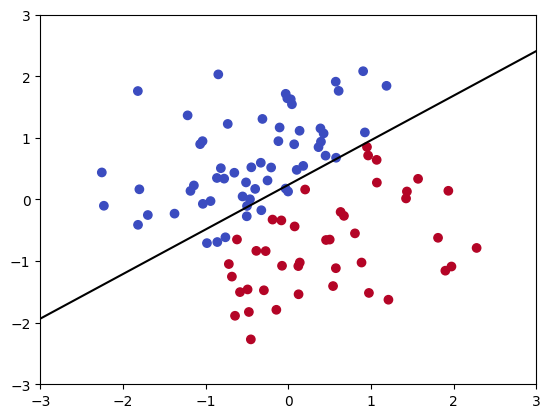

In [18]:
import matplotlib.pyplot as plt
import numpy as np

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()